In [74]:
import pandas as pd
import numpy as np
import pygad

In [75]:
data = pd.read_csv('data1.csv')
data

,KOTA,A,B,C,D,E,F,G
0,A,0,1,5,5,5,5,1
1,B,1,0,1,5,5,5,5
2,C,5,1,0,1,5,5,5
3,D,5,5,1,0,1,5,5
4,E,5,5,5,1,0,1,5
5,F,5,5,5,5,1,0,1
6,G,1,5,5,5,5,1,0


In [76]:
def cal_fitness(ga_instance, solution, solution_idx):
    distance = 0
    # 0 1 2 3 4
    for i in range(len(solution)):
        if i == 0:
            distance += data.iloc[0, solution[i]+1]
        elif i == len(solution)-1:
            distance += data.iloc[solution[i-1], solution[i]+1] + data.iloc[solution[i], 1]
        else:
            distance += data.iloc[solution[i-1], solution[i]+1]

    return -distance

In [77]:
def on_generation(ga):
    print("Generation", ga.generations_completed)
    print(ga.population)

In [78]:
ga_instance = pygad.GA(num_generations = 20,
                       num_parents_mating = 2,
                       fitness_func = cal_fitness,
                       sol_per_pop = 10,
                       num_genes = len(data)-1,
                       gene_type = int,
                       gene_space = np.arange(1,len(data)),
                       allow_duplicate_genes=False,
                       on_generation=on_generation,
                       mutation_type='random',
                       mutation_percent_genes=50
                       )

ga_instance.run()

Generation 1
[[6 2 3 4 5 1]
 [1 5 6 2 4 3]
 [6 5 4 2 1 3]
 [6 5 3 4 2 1]
 [6 5 1 4 2 3]
 [6 2 3 4 5 1]
 [4 5 2 3 6 1]
 [6 4 5 2 3 1]
 [2 5 1 4 6 3]
 [6 5 4 2 3 1]]
Generation 2
[[6 5 4 2 3 1]
 [6 2 3 1 5 4]
 [2 5 4 6 3 1]
 [1 4 5 2 3 6]
 [2 5 4 6 3 1]
 [2 5 4 6 1 3]
 [4 2 6 5 3 1]
 [5 6 4 2 3 1]
 [6 3 4 2 5 1]
 [5 4 2 6 3 1]]
Generation 3
[[6 5 4 2 3 1]
 [6 1 4 2 3 5]
 [6 5 4 2 3 1]
 [6 2 1 5 3 4]
 [5 6 4 2 3 1]
 [4 5 3 2 6 1]
 [4 6 5 2 3 1]
 [6 3 5 2 4 1]
 [4 1 2 6 3 5]
 [3 4 5 2 6 1]]
Generation 4
[[6 5 4 2 3 1]
 [6 1 5 2 3 4]
 [5 6 2 4 3 1]
 [6 3 4 1 5 2]
 [6 5 4 2 3 1]
 [6 5 4 1 2 3]
 [6 4 5 2 3 1]
 [6 3 4 5 2 1]
 [4 5 6 2 1 3]
 [6 5 4 1 3 2]]
Generation 5
[[6 3 4 5 2 1]
 [5 3 1 4 2 6]
 [2 5 3 1 6 4]
 [3 5 4 1 2 6]
 [6 5 4 3 2 1]
 [1 2 4 6 3 5]
 [4 5 6 2 3 1]
 [3 6 4 5 2 1]
 [6 4 3 5 2 1]
 [6 3 4 5 2 1]]
Generation 6
[[6 5 4 3 2 1]
 [6 5 3 4 2 1]
 [2 1 3 5 6 4]
 [6 5 4 3 1 2]
 [4 3 6 5 2 1]
 [6 3 4 5 2 1]
 [2 6 4 5 3 1]
 [2 3 4 5 6 1]
 [4 5 6 3 2 1]
 [6 1 4 5 2 3]]
Generation 7
[[6

/home/fafa/miniconda3/envs/py311/lib/python3.11/site-packages/pygad/pygad.py:1139: UserWarning: The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.
  warnings.warn("The 'delay_after_gen' parameter is deprecated starting from PyGAD 3.3.0. To delay or pause the evolution after each generation, assign a callback function/method to the 'on_generation' parameter to adds some time delay.")


In [79]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f"Parameters of the best solution : {solution}")
print(f"Fitness value of the best solution = {solution_fitness}")
print(f"Index of the best solution : {solution_idx}")

Parameters of the best solution : [6 5 4 3 2 1]
Fitness value of the best solution = -7
Index of the best solution : 0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


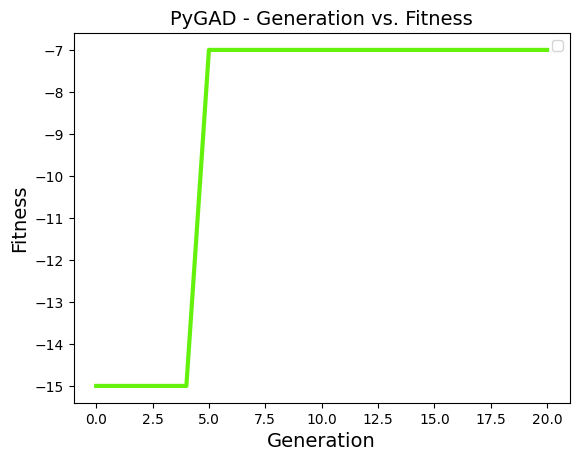

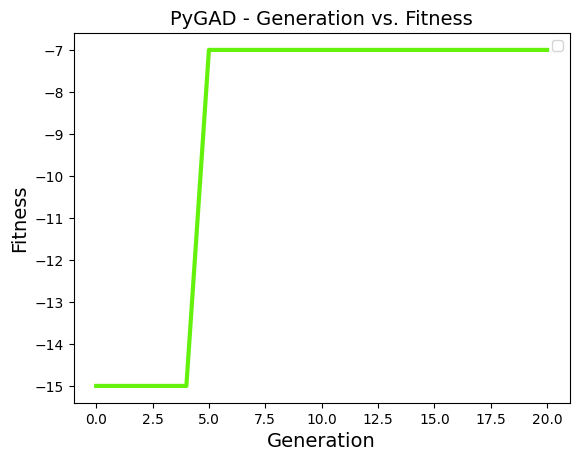

In [80]:
ga_instance.plot_fitness()